# Gradient Descent

## 1. Basic Gradient Descent

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
def grad(x):
    return 2*x + 5*np.cos(x)

def cost(x):
    return x**2 + 5*np.sin(x)

def GD(x0, eta):
    x = [x0]
    for it in range(1000):
        x_new = x[-1] - eta*grad(x[-1])
        if abs(grad(x_new)) < 1e-3:
            break
        x.append(x_new)
    return (x, it)

In [3]:
def draw(x1, ids, nrows = 2, ncols = 4, start = -5.5):
	x0 = np.linspace(start, 5.5, 1000)
	y0 = cost(x0)
	width = 4*ncols
	height = 4*nrows
	
	plt.close('all')
	fig, axs = plt.subplots(nrows, ncols, figsize=(width, height))
	for i,k in enumerate(ids):
		r = i//ncols
		c = i%ncols
		
		x = x1[ids[i]]
		y = cost(x)

		str0 = 'iter {}/{}, grad = {:.3f}'.format(ids[i], len(x1) - 1, grad(x))

		if nrows > 1:
			axs[r, c].plot(x0, y0, 'b')
			axs[r, c].set_xlabel(str0, fontsize = 13)
			axs[r, c].plot(x, y, 'ro', markersize = 7, markeredgecolor = 'k')
			axs[r, c].plot()
			axs[r, c].tick_params(axis='both', which='major', labelsize=13)

		else:
			axs[c].plot(x0, y0, 'b')
			axs[c].set_xlabel(str0, fontsize = 13)
			axs[c].plot(x, y, 'ro', markersize = 7, markeredgecolor = 'k')
			axs[c].plot()
			axs[c].tick_params(axis='both', which='major', labelsize=13)
	plt.show()

### learning rate = 0,1 and start point = 5

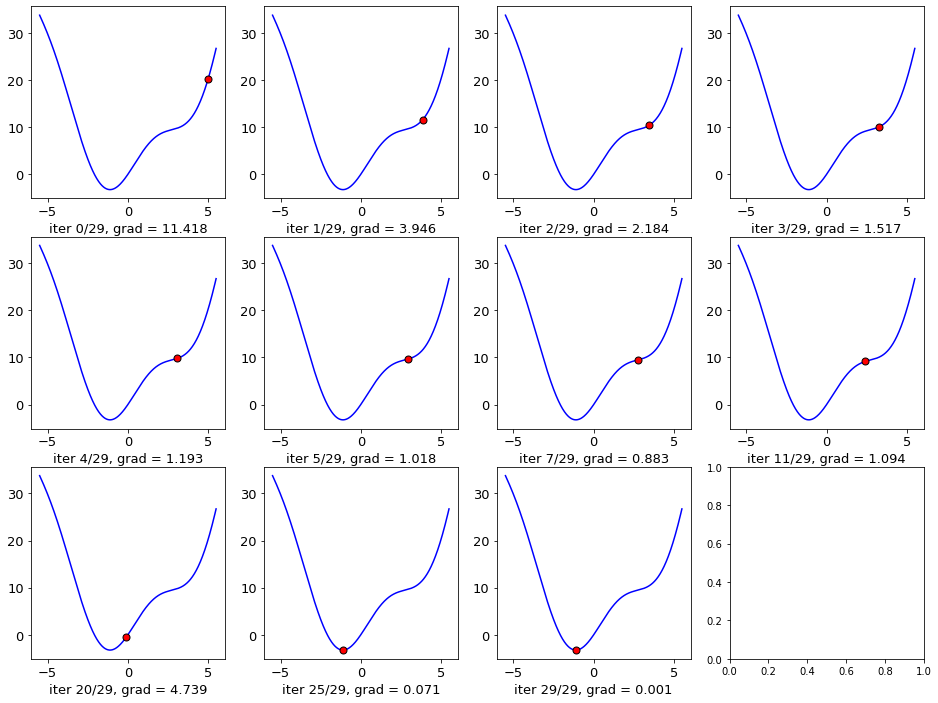

In [4]:
(x1, it1) = GD(5, .1)
ids = [0, 1, 2, 3, 4, 5, 7, 11, 20, 25, 29]
draw(x1, ids, 3)

### learning rate = 0,1 and start point = -5

In [5]:
(x2, it2) = GD(-5, .1)
it2

11

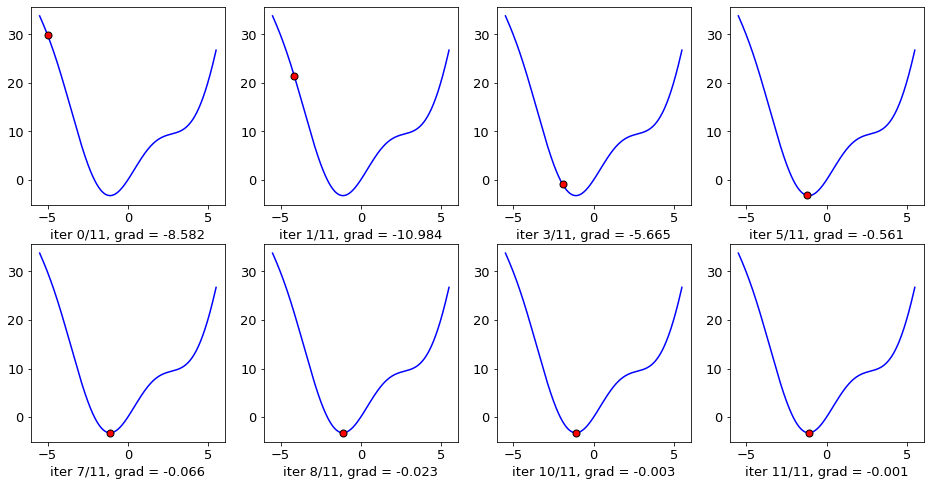

In [6]:
ids = [0, 1, 3, 5, 7, 8, 10, 11]
draw(x2, ids, 2)

### learning rate = 0,5 and start point = -5

In [7]:
(x3, it3) = GD(-5, .5)
it3

456

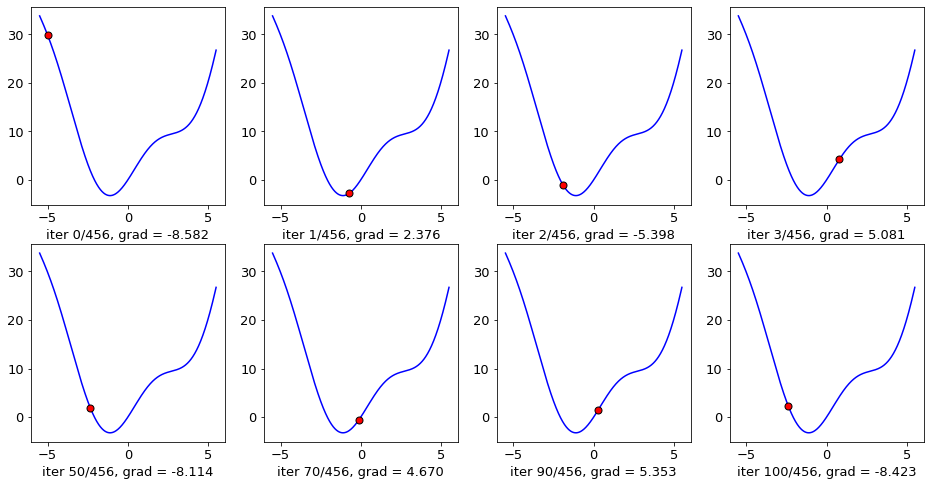

In [8]:
ids = [0, 1, 2, 3, 50, 70, 90, 100]
draw(x3, ids, 2)

## 2. GD for Multi Variables

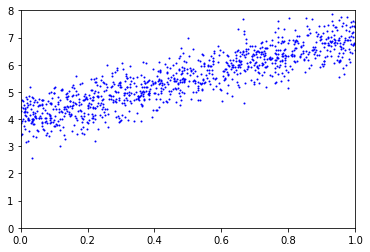

In [9]:
X = np.random.rand(1000)
y = 4 + 3*X + .5*np.random.randn(1000)

plt.plot(X, y, 'bo', markersize = 1)
plt.axis([0, 1, 0, 8])
plt.show()

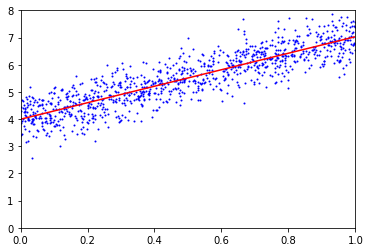

Solution found by LR of sklearn: 3.034955134662638 3.99512252853035


In [10]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X.reshape(-1, 1), y.reshape(-1, 1))
w, b = model.coef_[0][0], model.intercept_[0]

x0 = np.linspace(start = -.05, stop = 1.05, num = 20)
y0 = w*x0 + b


plt.plot(X, y, 'bo', markersize = 1)
plt.axis([0, 1, 0, 8])
plt.plot(x0, y0, 'r')
plt.show()

print('Solution found by LR of sklearn:', w, b)

In [11]:
def grad(w, Xbar):
    N = Xbar.shape[0]
    return  1/N * Xbar.T.dot(Xbar.dot(w) - y)

def cost(w, Xbar):
    N = Xbar.shape[0]
    return 0.5/N * np.linalg.norm(y - Xbar.T.dot(w))**2

def GD(w_init, eta, Xbar):
    w = [w_init]
    for it in range(1000):
        w_new = w[-1] - eta*grad(w[-1], Xbar)
        if np.linalg.norm(grad(w_new, Xbar))/len(w_new) < 1e-3:
            break
        w.append(w_new)
    return (w, it)

def draw(X0, Y0, w1, ids, nrows = 2, ncols = 4):
    width = 3*ncols
    height = 3*nrows

    plt.close('all')
    fig,axs=plt.subplots(nrows, ncols, figsize=(width, height))
    
    for i, k in enumerate(ids):
        r = i//ncols
        c = i%ncols

        b = w1[ids[i]][0]
        w = w1[ids[i]][1]
        x = np.linspace(start = 0, stop = 1, num = 20)
        y = w*x +b
        str0 = 'iter={}/{},w={:.2f},b={:.2f}'.format(ids[i], len(w1) - 1, b, w)
        if nrows > 1:
            axs[r, c].plot(X0, Y0, 'bo', markersize = .5)
            axs[r, c].set_xlabel(str0)
            axs[r, c].plot(x, y, 'r')
            axs[r, c].axis([0, 1, 0, 8])
            axs[r, c].plot()
            axs[r, c].tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
        else:
            axs[c].plot(X0, Y0, 'bo', markersize = .5)
            axs[c].set_xlabel(str0)
            axs[c].plot(x, y, 'r')
            axs[c].axis([0, 1, 0, 8])
            axs[c].plot()
            axs[r, c].tick_params(axis = 'both', which = 'major', labelsize = 13)

    plt.show()

In [12]:
Xbar = np.concatenate((np.ones((X.shape[0], 1)), X.reshape(-1, 1)), axis = 1)

w_init = np.array([1, 1])
w1, it1 = GD(w_init, .1, Xbar)
it1

384

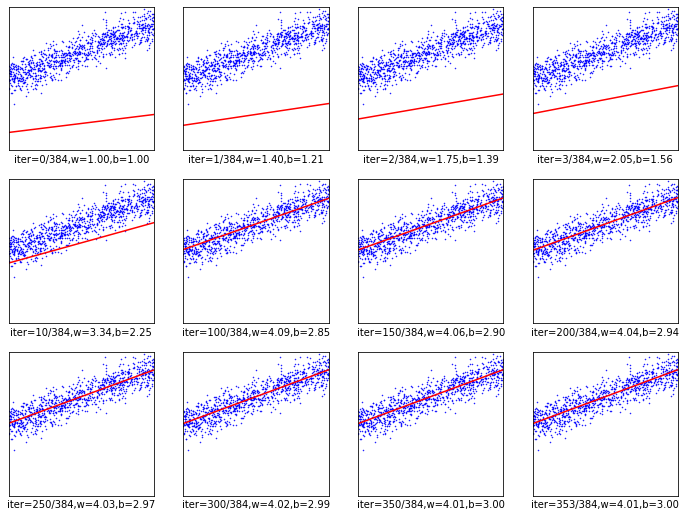

In [13]:
ids = [0, 1, 2, 3, 10, 100, 150, 200, 250, 300, 350, 353]
draw(X, y, w1, ids, 3, 4)

In [14]:
w_init = np.array([1, 1])
w2, it2 = GD(w_init, 1, Xbar)
it2

37

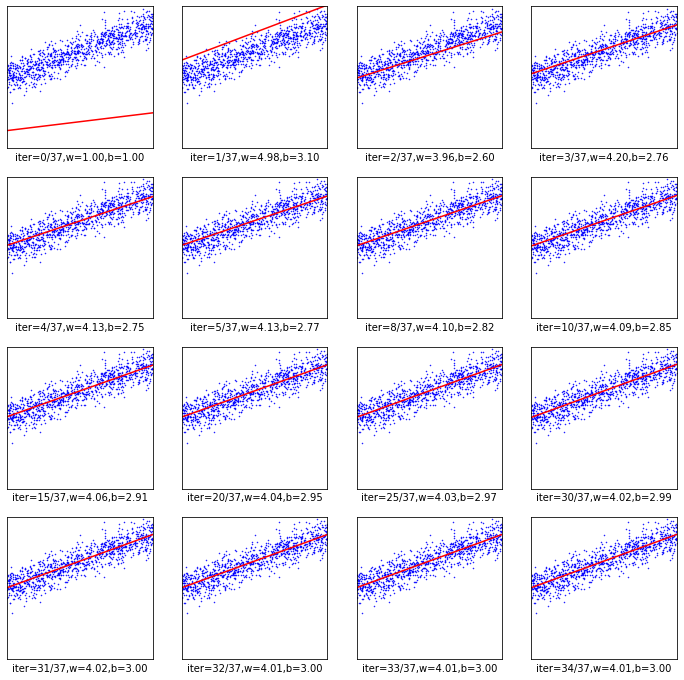

In [15]:
ids = [0, 1, 2, 3, 4, 5, 8, 10, 15, 20, 25, 30, 31, 32, 33, 34]
draw(X, y, w2, ids, 4, 4)

## 3. GD with Momentum
x^2 + 10sin(x)

In [16]:
def grad(x):
    return 2*x + 10*np.cos(x)

def cost(x):
    return x**2 + 10*np.sin(x)

def GD_momentum(theta_init, eta, gamma):
    theta = [theta_init]
    v_old = np.zeros_like(theta_init)
    for it in range(1000):
        v_new = gamma*v_old + eta*grad(theta[-1])
        theta_new = theta[-1] - v_new
        if np.linalg.norm(grad(theta_new))/np.array(theta_init).size < 1e-3:
            break
        theta.append(theta_new)
        v_old = v_new
    return theta, it

def draw(w, ids, nrows=2, ncols=4):
    height=4*nrows
    width=3.5*ncols

    x0 = np.linspace(start = -5.5, stop = 5.5, num = 100)
    y0 = cost(x0)

    fig,axs=plt.subplots(nrows, ncols, figsize = (width, height))
    for i, k in enumerate(ids):
        r = i//ncols
        c = i%ncols

        x = w[k]
        y = cost(x)

        str0 = 'iter {}/{}, x = {:.2f}, y = {:.2f}, grad = {:.3f}'.format(k, len(w)-1, x, y, grad(x))
        if nrows > 1:
            axs[r, c].plot(x0, y0, 'm')
            axs[r, c].set_xlabel(str0, fontsize=8)
            axs[r, c].plot(x, y, 'bo')
            axs[r, c].set_xticks([-5.5, 0, 5.5])
        else:
            axs[c].plot(x0, y0, 'm')
            axs[c].set_xlabel(str0, fontsize=8)
            axs[c].plot(x, y, 'bo')
            axs[c].set_xticks([-5.5, 0, 5.5])
    plt.show()

In [17]:
theta1, it1 = GD_momentum(5.5, 0.1, 0.9)
it1

138

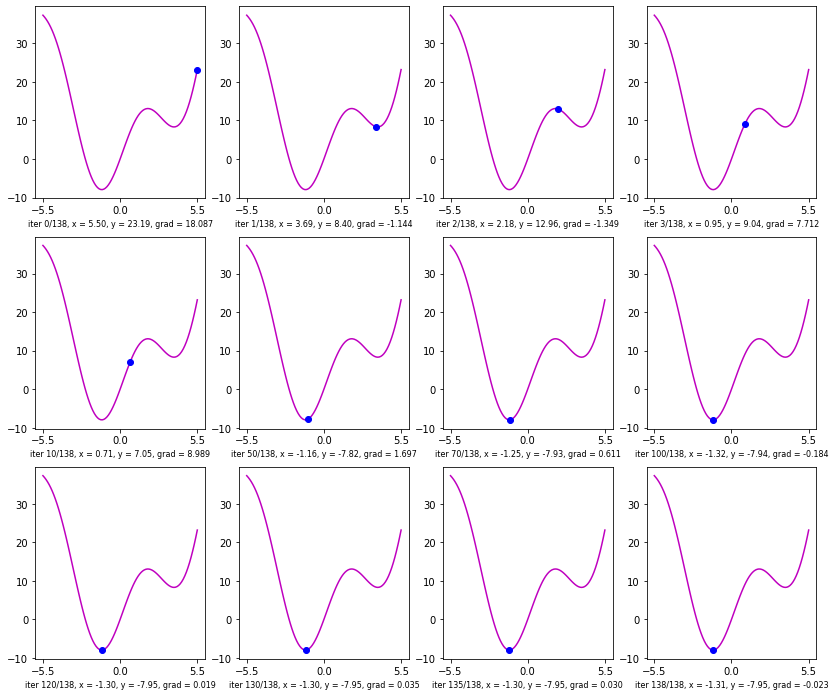

In [18]:
ids = [0, 1, 2, 3, 10, 50, 70, 100, 120, 130, 135, 138]
draw(theta1, ids, 3, 4)

## 4. GAD with NAG

In [19]:
def GD_NAG(theta_init, eta, gamma):
    theta = [theta_init]
    v =[np.zeros_like(theta_init)]
    for it in range(1000):
        v_new = gamma*v[-1] + eta*grad(theta[-1] - gamma*v[-1])
        theta_new = theta[-1] - v_new
        if np.linalg.norm(grad(theta_new))/np.array(theta_init).size < 1e-3:
            break
        v.append(v_new)
        theta.append(theta_new)
    return theta, it

In [20]:
theta2, it2 = GD_NAG(5.5, 0.1, 0.9)
it2

16

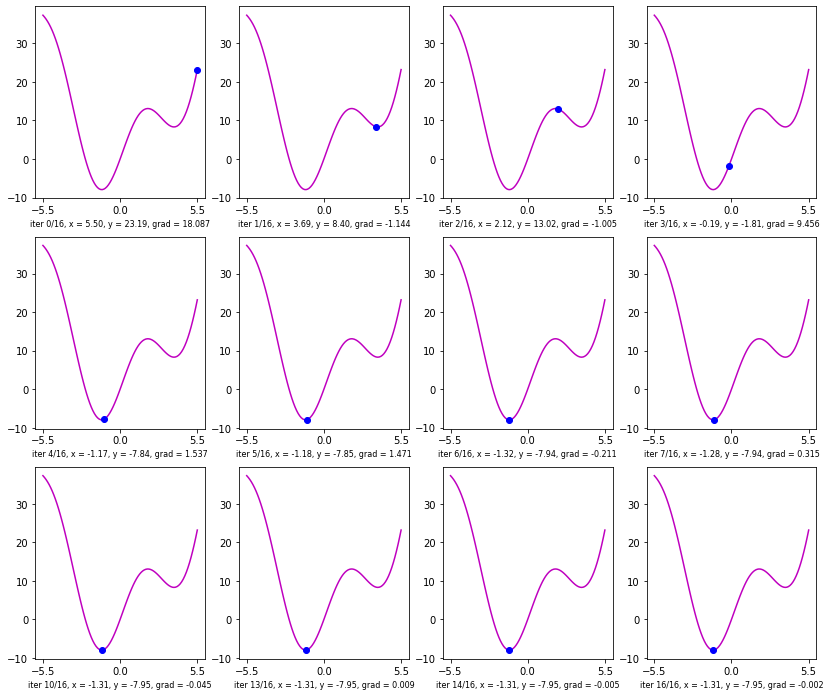

In [21]:
ids = [0, 1, 2, 3, 4, 5, 6, 7, 10, 13, 14 ,16]
draw(theta2, ids, 3, 4)